# Classification ( In progress)

In [3]:
import pandas as pd
import numpy as np
import re
# from unidecode import unidecode


import spacy
from spacy.lang.en import English
from spacy import displacy
nlp = spacy.load('en_core_web_sm', disable=["ner", "textcat", "entity_ruler", "merge_noun_chunks", "merge_entities", "merge_subtokens"])

In [4]:
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns
import matplotlib.pylab as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [6]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)

In [7]:
dfExoplanetsNASAannot = pd.read_json('../data/dfExoplanetsNASAdetected100rand_v2.json', orient = 'table')
del dfExoplanetsNASAannot['tagRootSent']
del dfExoplanetsNASAannot['tagDetected']
dfExoplanetsNASAannot.head(20)

,sent,label
0,"We detected visual companions within 1'' for 5 stars, between 1'' and 2'' for 7 stars, and between 2'' and 4'' for 15 stars.",discovery
1,"Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new...",discovery
2,"Of the over 800 exoplanets detected to date, over half are on non-circular orbits, with eccentricities as high as 0.93.",None
3,"We find that for these false positive scenarios, CO at 2.35 μm, CO_2 at 2.0 and 4.3 μm, and O_4 at 1.27 μm are all stronger features in transmission than O_2/O_3 and could be detected with S/Ns ≳ 3 for an Earth-size planet orbiting a nearby M dwarf star wi...",discovery
4,We present two exoplanets detected at Keck Observatory.,discovery
5,"This disfavours the possibility of GI-caused spiral structure in systems with q&lt;0.25 being detected in relatively short integration times, such as those found in the DSHARP ALMA survey (Andrews et al. 2018; Huang et al. 2018).",None
6,"Planets lying in this zone are then more easily detected with the radial-velocity method [3], the most successful in detecting exoplanets.",None
7,"The 2004 flux density was 0.05 Jy, about an order of magnitude lower than the single 2003 burst and the five bursts detected in 2002.",discovery
8,"This statement is supported by a figure given in the article, which shows a primary signal with a depth of 6 mmag, detected with 4σ confidence and a possible secondary signal with a depth of 2 mmag.",None
9,"Combining these instruments with powerful telescopes, astronomers have detected thousands of exoplanets.",None


In [8]:
def satz_analytic2(satz):
#    merkmal = dict({"satz":satz.text})
    merkmal=dict({})
# search for main verb
    for t in satz:
        if t.dep_ == "ROOT":
            r=t.head.text
            merkmal.update({"act":r})
# subject and object related to verb
    for t in satz:
#        if t.dep_ == "dobj" and merkmal["act"]==t.head.text:
#            merkmal.update({"obj":''.join(w.text_with_ws for w in t.subtree)})
        if t.dep_ == "nsubj" and merkmal["act"]==t.head.text:
            merkmal.update({"subject":t.text.lower()})

    return(merkmal)


In [9]:
dfExoplanetsNASAannot["s"]=dfExoplanetsNASAannot["sent"].apply(lambda y: satz_analytic2(nlp(y)))
dfExoplanetsNASAannot.head(20)

,sent,label,s
0,"We detected visual companions within 1'' for 5 stars, between 1'' and 2'' for 7 stars, and between 2'' and 4'' for 15 stars.",discovery,"{'act': 'detected', 'subject': 'we'}"
1,"Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new...",discovery,"{'act': 'identified', 'subject': 'we'}"
2,"Of the over 800 exoplanets detected to date, over half are on non-circular orbits, with eccentricities as high as 0.93.",None,"{'act': 'are', 'subject': 'half'}"
3,"We find that for these false positive scenarios, CO at 2.35 μm, CO_2 at 2.0 and 4.3 μm, and O_4 at 1.27 μm are all stronger features in transmission than O_2/O_3 and could be detected with S/Ns ≳ 3 for an Earth-size planet orbiting a nearby M dwarf star wi...",discovery,"{'act': 'find', 'subject': 'we'}"
4,We present two exoplanets detected at Keck Observatory.,discovery,"{'act': 'present', 'subject': 'we'}"
5,"This disfavours the possibility of GI-caused spiral structure in systems with q&lt;0.25 being detected in relatively short integration times, such as those found in the DSHARP ALMA survey (Andrews et al. 2018; Huang et al. 2018).",None,{'act': 'al'}
6,"Planets lying in this zone are then more easily detected with the radial-velocity method [3], the most successful in detecting exoplanets.",None,{'act': 'detected'}
7,"The 2004 flux density was 0.05 Jy, about an order of magnitude lower than the single 2003 burst and the five bursts detected in 2002.",discovery,"{'act': 'was', 'subject': 'density'}"
8,"This statement is supported by a figure given in the article, which shows a primary signal with a depth of 6 mmag, detected with 4σ confidence and a possible secondary signal with a depth of 2 mmag.",None,{'act': 'supported'}
9,"Combining these instruments with powerful telescopes, astronomers have detected thousands of exoplanets.",None,"{'act': 'detected', 'subject': 'astronomers'}"


In [10]:
_all_xs=list(dfExoplanetsNASAannot["sent"])


In [11]:
_all_ys=np.array(list(dfExoplanetsNASAannot["label"]))

In [12]:
def transp(x):
    if x=="discovery":
        y=1
    else:
        y=0
    return(y)
dfExoplanetsNASAannot["label"]=dfExoplanetsNASAannot["label"].apply(lambda x: transp(x))

In [13]:
dfExoplanetsNASAannot.head(10)

,sent,label,s
0,"We detected visual companions within 1'' for 5 stars, between 1'' and 2'' for 7 stars, and between 2'' and 4'' for 15 stars.",1,"{'act': 'detected', 'subject': 'we'}"
1,"Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new...",1,"{'act': 'identified', 'subject': 'we'}"
2,"Of the over 800 exoplanets detected to date, over half are on non-circular orbits, with eccentricities as high as 0.93.",0,"{'act': 'are', 'subject': 'half'}"
3,"We find that for these false positive scenarios, CO at 2.35 μm, CO_2 at 2.0 and 4.3 μm, and O_4 at 1.27 μm are all stronger features in transmission than O_2/O_3 and could be detected with S/Ns ≳ 3 for an Earth-size planet orbiting a nearby M dwarf star wi...",1,"{'act': 'find', 'subject': 'we'}"
4,We present two exoplanets detected at Keck Observatory.,1,"{'act': 'present', 'subject': 'we'}"
5,"This disfavours the possibility of GI-caused spiral structure in systems with q&lt;0.25 being detected in relatively short integration times, such as those found in the DSHARP ALMA survey (Andrews et al. 2018; Huang et al. 2018).",0,{'act': 'al'}
6,"Planets lying in this zone are then more easily detected with the radial-velocity method [3], the most successful in detecting exoplanets.",0,{'act': 'detected'}
7,"The 2004 flux density was 0.05 Jy, about an order of magnitude lower than the single 2003 burst and the five bursts detected in 2002.",1,"{'act': 'was', 'subject': 'density'}"
8,"This statement is supported by a figure given in the article, which shows a primary signal with a depth of 6 mmag, detected with 4σ confidence and a possible secondary signal with a depth of 2 mmag.",0,{'act': 'supported'}
9,"Combining these instruments with powerful telescopes, astronomers have detected thousands of exoplanets.",0,"{'act': 'detected', 'subject': 'astronomers'}"


In [14]:
_all_xs[1]

'Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new candidate transitional, evolved, evolved transitional, and debris disks.'

In [254]:
X=list(dfExoplanetsNASAannot["sent"])
Y=np.array(list(dfExoplanetsNASAannot["label"]))



In [255]:
X[1]

'Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new candidate transitional, evolved, evolved transitional, and debris disks.'

In [256]:
Y[1]

1

In [257]:
from collections import Counter
Category=Counter(Y)
Counter=dict(Category)

In [258]:
Counter

{1: 40, 0: 60}

Text(0.5, 1.0, 'Distribution of samples over different classes')

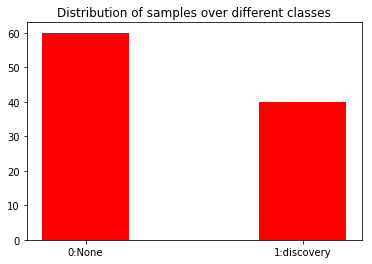

In [259]:
plt.bar(list(Counter.keys()),Counter.values(),color="r",width=.4,tick_label=["1:discovery","0:None"])
plt.title("Distribution of samples over different classes")


In [290]:
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold




In [291]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

X,Y = shuffle(X, Y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,Y, test_size=0.25, random_state=42)    


In [292]:
len(Y)

100

# Baseline model_01

In [293]:
pipeline_01 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('chi',  SelectKBest(chi2, k="all")),
                     ('clf', XGBClassifier())])


In [294]:
pipeline_01 = Pipeline([('tfidf', TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7) ),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0))])


In [389]:
pipeline_01.fit(X_train,y_train)

C:\Users\moha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=1500, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [411]:
y_test=pipeline_01.predict(X_test)

In [162]:
X_train[1:20]

['No multiplets were detected leaving EC 01541-1409 as yet another rich p-mode sdB pulsator without these features, limiting observational constraints on pulsation modes.',
 'The observing campaigns presented here reveal no pulsations other than the initially detected frequency.',
 'Likewise, Ganymede observations were attempted at 3.6 μm by the Spitzer Space Telescope, but it was not detected, suggesting a significant wavelength dependence.',
 'Finally, the planet-star contrast must exceed a certain minimum value in order for the planet to be detected.',
 'The detected planets shepherd the outer cool debris belt.',
 'Although microlensing searches have so far detected only a handful of planets, these have already changed our understanding of planet formation beyond the snow line.',
 'The orbital companion of Fomalhaut, Fomalhaut b, is detected in multi-color, coronagraphic observations acquired with the Hubble Space Telescope using the high-resolution channel of the Advanced Camera fo

# Baseline model_02

In [327]:
vec = TfidfVectorizer(min_df=3, stop_words='english',ngram_range=(1, 2))
svd = TruncatedSVD(n_components=69, n_iter=10, random_state=42)
pipe = make_pipeline(vec, svd)
clf = SVC(C=1, gamma=2e-2, probability=True)
pipeline_02 = make_pipeline(pipe, clf)






In [328]:
pipeline_02.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_ran...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [329]:
y_pred=pipeline_02.predict(X_test)

# Baseline model_03

In [367]:
pipeline_03 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', SGDClassifier(n_iter=100, random_state=42))])

In [368]:
pipeline_03.fit(X_train,y_train)

C:\Users\moha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [369]:
y_pred=pipeline_03.predict(X_test)

# Baseline model_04

In [297]:
from sklearn.pipeline import Pipeline
vec=TfidfVectorizer()
clf= SGDClassifier(max_iter=70,tol=.001)
pipeline_04=Pipeline([("vect",vec),("clf",clf)]).fit(X_train,y_train)

In [298]:
pipeline_04.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
..._state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [299]:
y_pred=pipeline_04.predict(X_test)

# Evaluation

# 1- Kfold Method

In [300]:
scores = cross_val_score(pipeline_04, X, Y, cv=10)
print(scores)
print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))

[0.6 0.7 0.7 0.7 0.7 0.8 0.8 0.6 0.7 0.7]
Accuracy: 0.700 ± 0.126


## 2-Holdout Method

## Accuracy

In [301]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, y_pred)


In [907]:
Y

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [908]:
len(set(Y))

2

## Confusion Matrix 

In [302]:
def Color_Confusion_Matrix(y, y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    l=len(set(Y))
    df_cm = pd.DataFrame(cm, range(l), range(l))
    sns.set(font_scale=1)
    sns.heatmap(df_cm,cmap="Blues", annot=True,annot_kws={"size": 16})
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    plt.title("Confusion Matrix", size = 16)
    plt.savefig('CM_Test_01.png')

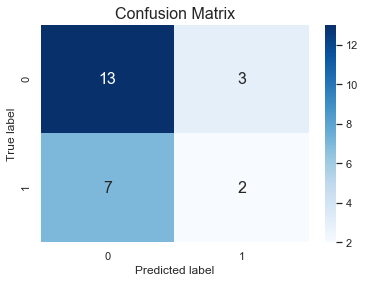

In [303]:
Color_Confusion_Matrix(y=Y, y_test=y_test, y_pred=y_pred)

## Classification Report

In [304]:
cr=classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.40      0.22      0.29         9

   micro avg       0.60      0.60      0.60        25
   macro avg       0.53      0.52      0.50        25
weighted avg       0.56      0.60      0.57        25



In [289]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0])

In [560]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1])

## ROC Curve and AUC

In [912]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
def plot_roc_curve(fpr, tpr,auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve with AUC {:.3f}'.format(AUC))
    plt.legend()
    plt.show()

In [913]:
AUC = roc_auc_score(y_test,y_pred)  


In [914]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)  

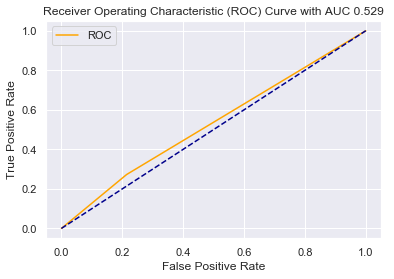

In [915]:
plot_roc_curve(fpr,tpr,AUC)

In [789]:
from eli5 import show_weights
show_weights(pipeline_04, top=60)

Weight?,Feature
+5.943,we
+4.300,flares
+4.144,which
+4.029,disks
+3.889,radio
+3.882,an
+3.814,line
+3.737,all
+3.440,consistent
+3.406,layer


In [916]:
import eli5
eli5.show_prediction(clf, X_train[22],vec=vec)

In [917]:
eli5.show_prediction(clf, X_train[74],vec=vec)

In [807]:
eli5.show_prediction(clf, X_train[70],vec=vec)

# Parameter Tuning


In [918]:
param_grid_01 = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
   'clf__max_iter' : [5,10,25,50,100,200,250,400,600,900,1000],
   'clf__tol' : np.logspace(-4,0,5)
}
pipeline_04_01 = GridSearchCV(pipeline_04, param_grid=param_grid_01, cv=5, n_jobs=-1, verbose=3, error_score=0)

In [919]:
pipeline_04_01.fit(X,Y)

Fitting 5 folds for each of 495 candidates, totalling 2475 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 2475 out of 2475 | elapsed:    9.6s finished


GridSearchCV(cv=5, error_score=0,
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
..._state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.25, 0.5, 0.75), 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)], 'clf__max_iter': [5, 10, 25, 50, 100, 200, 250, 400, 600, 900, 1000], 'clf__tol': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [920]:
print(pipeline_04_01.best_params_)
print(pipeline_04_01.best_score_)
print(pipeline_04_01.best_estimator_)

{'clf__max_iter': 250,
 'clf__tol': 0.1,
 'vect__max_df': 0.75,
 'vect__ngram_range': (1, 1)}
0.73
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.75, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...om_state=None, shuffle=True, tol=0.1,
       validation_fraction=0.1, verbose=0, warm_start=False))])


In [921]:
from pandas import DataFrame
from pprint import pprint as print
print(pipeline_04_01.cv_results_.keys())
print(DataFrame(pipeline_04_01.cv_results_))

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf__max_iter', 'param_clf__tol', 'param_vect__max_df', 'param_vect__ngram_range', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.009375      0.001017         0.001994    6.309774e-04   
1         0.018151      0.003301         0.002593    7.981539e-04   
2         0.024735      0.002394         0.002992    6.312790e-04   
3         0.007380      0.000798         0.002593    1.353141e-03   
4         0.013165      0.001163         0.002792    7.461365e-04   
5         0.019257      0.000815         0.002094    2.048434e-04   
6         0.006883      0

In [922]:
print("Best parameters set:")
print (pipeline_04_01.best_estimator_.steps)

'Best parameters set:'
[('vect',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.75, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)),
 ('clf',
  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=250,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.1,
       validation_fraction=0.1, verbose=0, warm_start=False))]


In [305]:
vec=TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
clf= SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.01,
       validation_fraction=0.1, verbose=0, warm_start=False)
pipeline_05=Pipeline([("vect",vec),("clf",clf)]).fit(X_train,y_train)

In [306]:
pipeline_05.fit(X,Y)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=0.01,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [307]:
scores = cross_val_score(pipeline_05, X, Y, cv=10)
print(scores)
print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))

[0.6 0.7 0.7 0.8 0.8 0.8 0.6 0.5 0.5 0.6]
Accuracy: 0.660 ± 0.223


In [931]:
y_pred=pipeline_05.predict(X_test)

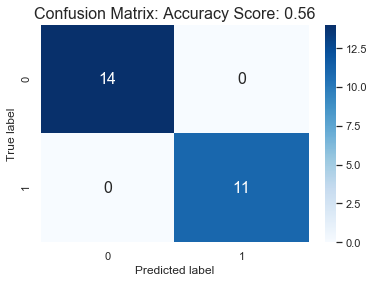

In [932]:
Color_Confusion_Matrix(y=Y,y_test=y_test,y_pred=y_pred)

In [42]:
print(kf.split(X))
kf.get_n_splits(X)

<generator object _BaseKFold.split at 0x000001C870CE6390>


5

In [44]:
for train_index, test_index in kf.split(X):
        print(train_index)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  

In [208]:
X_list[0:4]

[["We detected visual companions within 1'' for 5 stars, between 1'' and 2'' for 7 stars, and between 2'' and 4'' for 15 stars."],
 ['Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new candidate transitional, evolved, evolved transitional, and debris disks.'],
 ['Of the over 800 exoplanets detected to date, over half are on non-circular orbits, with eccentricities as high as 0.93.'],
 ['We find that for these false positive scenarios, CO at 2.35 μm, CO_2 at 2.0 and 4.3 μm, and O_4 at 1.27 μm are all stronger features in transmission than O_2/O_3 and could be detected with S/Ns ≳ 3 for an Earth-size planet orbiting a nearby M dwarf star with as few as 10 transits, assuming photon-limited noise.']]

In [210]:
X_np=np.array(X_list)

In [216]:
print(X_train)

<built-in method tolist of numpy.ndarray object at 0x000001C808672530>


In [308]:
y_pred = cross_val_predict(pipeline_05, X, Y, cv=10)
cm = confusion_matrix(y_pred,Y)

In [309]:
conf_mat

array([[50, 21],
       [10, 19]], dtype=int64)

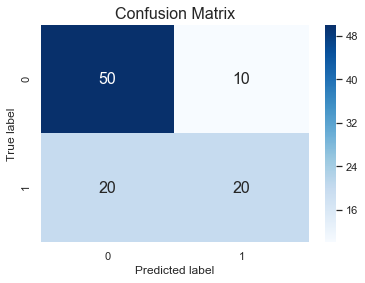

In [310]:
Color_Confusion_Matrix(y=Y,y_test=Y,y_pred=y_pred)